### Package installation

In [1]:
# !pip install psycopg2

In [2]:
#pip install openpyxl

### Package call

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import MinMaxScaler

### Load

***Connect to the database***

In [2]:

class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Rsjintu8",
                                           host = "localhost", #"127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


## Load dataset

In [15]:
cur = con.cursor()
select_stmt = "SELECT i.item_key as item, t.month, t.year, SUM(f.total_price) as total_sale_price "\
"FROM ecomdb.fact_table as f "\
"JOIN ecomdb.store_dim as s ON s.store_key = f.store_key "\
"JOIN ecomdb.time_dim as t ON t.time_key = f.time_key "\
"JOIN ecomdb.item_dim as i ON i.item_key = f.item_key "\
"GROUP BY (i.item_key,t.year,t.month)"
cur.execute(select_stmt)
records = cur.fetchall()
# records

In [16]:
df = pd.DataFrame(list(records), columns=['Item', 'Month', 'Year', 'Total_sale_price'])
df = df.dropna()
df

,Item,Month,Year,Total_sale_price
0,I00001,1,2014,1518.00
1,I00001,2,2014,2794.50
2,I00001,3,2014,2921.00
3,I00001,4,2014,3737.50
4,I00001,5,2014,2679.50
...,...,...,...,...
22435,I00264,9,2020,4155.00
22436,I00264,10,2020,6315.00
22437,I00264,11,2020,2910.00
22438,I00264,12,2020,6390.00


In [17]:
df.shape

(22440, 4)

# Data Preprocessing

### Using pandas to create dummy variables

In [18]:
dummies = pd.get_dummies(df.Item)
dummies.head(3)

,I00001,I00002,I00003,I00004,I00005,I00006,I00007,I00008,I00009,I00010,...,I00255,I00256,I00257,I00258,I00259,I00260,I00261,I00262,I00263,I00264
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies.shape

(22440, 264)

In [20]:
df= pd.concat([df,dummies],axis='columns')
df.head(3)

,Item,Month,Year,Total_sale_price,I00001,I00002,I00003,I00004,I00005,I00006,...,I00255,I00256,I00257,I00258,I00259,I00260,I00261,I00262,I00263,I00264
0,I00001,1,2014,1518.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,I00001,2,2014,2794.50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I00001,3,2014,2921.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(22440, 268)

In [22]:
df = df.drop(['Item'], axis='columns')
df.head(3)

,Month,Year,Total_sale_price,I00001,I00002,I00003,I00004,I00005,I00006,I00007,...,I00255,I00256,I00257,I00258,I00259,I00260,I00261,I00262,I00263,I00264
0,1,2014,1518.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2014,2794.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2014,2921.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Dummy Variable Trap
df = df.drop(['I00264'], axis='columns')
df.head(3)

,Month,Year,Total_sale_price,I00001,I00002,I00003,I00004,I00005,I00006,I00007,...,I00254,I00255,I00256,I00257,I00258,I00259,I00260,I00261,I00262,I00263
0,1,2014,1518.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2014,2794.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2014,2921.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(22440, 266)

### scaling Year

In [25]:
# scaler = MinMaxScaler()
# scaler.fit(df[['Year']])
# df['Year'] = scaler.transform(df[['Year']])
# df['Year'].values

In [26]:
df['Year']

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
22435    2020
22436    2020
22437    2020
22438    2020
22439    2021
Name: Year, Length: 22440, dtype: int64

In [27]:
df

,Month,Year,Total_sale_price,I00001,I00002,I00003,I00004,I00005,I00006,I00007,...,I00254,I00255,I00256,I00257,I00258,I00259,I00260,I00261,I00262,I00263
0,1,2014,1518.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2014,2794.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2014,2921.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2014,3737.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2014,2679.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,9,2020,4155.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22436,10,2020,6315.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22437,11,2020,2910.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22438,12,2020,6390.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def data_qualityCheck():
    print("Checking data quality....")
    df.isnull().sum()
    df.info()
    print("check finished.")

data_qualityCheck()

Checking data quality....
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22440 entries, 0 to 22439
Columns: 266 entries, Month to I00263
dtypes: int64(2), object(1), uint8(263)
memory usage: 6.3+ MB
check finished.


##### X and Y declaration

In [29]:
X = df.drop(['Total_sale_price'], axis='columns')
X.shape

(22440, 265)

In [30]:
y = df['Total_sale_price']
y.shape

(22440,)

In [31]:
# train test split
# 80% for training the models
# 20% for testing the models

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(17952, 265)

In [33]:
X_test.shape

(4488, 265)

## Supervised Learning

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor   
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures 

In [35]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict((X_test))
    score1 = metrics.r2_score(y_test, y_predict) # score1 = model.score(X_test, y_test)
    score2 = round(score1*100,2)
    return score2

### r2_score

In [36]:
### Without scaling the Year

# LinearRegression
lr = LinearRegression()
print('Linear Regression: ', get_score(lr, X_train, X_test, y_train, y_test))
      
      
# GaussianProcessRegressor
# GRReg = GaussianProcessRegressor()
# print('Gaussian Process Regressor: ', get_score(GRReg, X_train, X_test, y_train, y_test))

      
# RidgeRegression
rr = Ridge(alpha=0)
print('Ridge Regression: ', get_score(rr, X_train, X_test, y_train, y_test))   


# LassoRegression
lasso=Lasso()
print('Lasso Regression: ', get_score(lasso, X_train, X_test, y_train, y_test))


# PolynomialRegression
# polynom = PolynomialFeatures(degree = 20) 
# X_polynom = polynom.fit_transform(X_train) 
# X_test_polynom = polynom.fit_transform(X_test)
# PolyReg = LinearRegression() 
# print('Polynomial Regression: ', get_score(PolyReg, X_polynom, X_test_polynom, y_train, y_test))


# DecisionTreeRegression
DtReg = DecisionTreeRegressor(random_state = 0) 
print('Decision Tree Regression: ', get_score(DtReg, X_train, X_test, y_train, y_test))


# RandomForestRegression
RFReg = RandomForestRegressor(n_estimators = 40, random_state = 0)
print('Random Forest Regression: ', get_score(RFReg, X_train, X_test, y_train, y_test))   


# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
print('Gradient Boosting Regressor: ', get_score(gbr, X_train, X_test, y_train, y_test))


# Extreme Gradient Boosting(XGB) Regressor
xgb = XGBRegressor()
print('Extreme Gradient Boosting(XGB) Regressor', get_score(xgb, X_train, X_test, y_train, y_test))


# KNeighborsRegressor
# scaler = MinMaxScaler()
# scaler.fit(X_train[['Year']])
# X_train['Year'] = scaler.transform(X_train[['Year']])
# scaler1 = MinMaxScaler()
# scaler1.fit(X_test[['Year']])
# X_test['Year'] = scaler1.transform(X_test[['Year']])
KNReg = KNeighborsRegressor(n_neighbors=5) 
print('K-Neighbors Regressor: ', get_score(KNReg, X_train, X_test, y_train, y_test))


# SupportVectorRegression
svr = SVR()
print('Support Vector Regression: ', get_score(svr, X_train, X_test, y_train, y_test))


# Robust Regression — RANSAC
ransac = RANSACRegressor()
print('Robust Regression — RANSAC: ', get_score(ransac, X_train, X_test, y_train, y_test))

Linear Regression:  84.25
Ridge Regression:  84.25
Lasso Regression:  83.47
Decision Tree Regression:  70.17
Random Forest Regression:  80.42
Gradient Boosting Regressor:  59.92
Extreme Gradient Boosting(XGB) Regressor 82.78
K-Neighbors Regressor:  60.8
Support Vector Regression:  -3.72
Robust Regression — RANSAC:  -5.252247182845012e+20


In [46]:
# After scaling the Year

# LinearRegression
lr = LinearRegression()
print('Linear Regression: ', get_score(lr, X_train, X_test, y_train, y_test))
      
      
# GaussianProcessRegressor
# GRReg = GaussianProcessRegressor()
# print('Gaussian Process Regressor: ', get_score(GRReg, X_train, X_test, y_train, y_test))

      
# RidgeRegression
rr = Ridge(alpha=0)
print('Ridge Regression: ', get_score(rr, X_train, X_test, y_train, y_test))   


# LassoRegression
lasso=Lasso()
print('Lasso Regression: ', get_score(lasso, X_train, X_test, y_train, y_test))


# PolynomialRegression
# polynom = PolynomialFeatures(degree = 2) 
# X_polynom = polynom.fit_transform(X_train) 
# X_test_polynom = polynom.fit_transform(X_test)
# PolyReg = LinearRegression() 
# print('Polynomial Regression: ', get_score(PolyReg, X_polynom, X_test_polynom, y_train, y_test))


# DecisionTreeRegression
DtReg = DecisionTreeRegressor(random_state = 0) 
print('Decision Tree Regression: ', get_score(DtReg, X_train, X_test, y_train, y_test))


# RandomForestRegression
RFReg = RandomForestRegressor(n_estimators = 10, random_state = 0)
print('Random Forest Regression: ', get_score(RFReg, X_train, X_test, y_train, y_test))   


# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
print('Gradient Boosting Regressor: ', get_score(gbr, X_train, X_test, y_train, y_test))


# Extreme Gradient Boosting(XGB) Regressor
xgb = XGBRegressor()
print('Extreme Gradient Boosting(XGB) Regressor', get_score(xgb, X_train, X_test, y_train, y_test))


# KNeighborsRegressor
scaler = MinMaxScaler()
scaler.fit(X_train[['Year']])
X_train['Year'] = scaler.transform(X_train[['Year']])
scaler1 = MinMaxScaler()
scaler1.fit(X_test[['Year']])
X_test['Year'] = scaler1.transform(X_test[['Year']])
KNReg = KNeighborsRegressor(n_neighbors=5) 
print('K-Neighbors Regressor: ', get_score(KNReg, X_train, X_test, y_train, y_test))


# SupportVectorRegression
svr = SVR()
print('Support Vector Regression: ', get_score(svr, X_train, X_test, y_train, y_test))


# Robust Regression — RANSAC
ransac = RANSACRegressor()
print('Robust Regression — RANSAC: ', get_score(ransac, X_train, X_test, y_train, y_test))

Linear Regression:  84.25
Ridge Regression:  84.25
Lasso Regression:  83.47
Decision Tree Regression:  69.99
Random Forest Regression:  79.54
Gradient Boosting Regressor:  59.92
Extreme Gradient Boosting(XGB) Regressor 82.78


c:\python\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\python\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


K-Neighbors Regressor:  80.88
Support Vector Regression:  -3.49
Robust Regression — RANSAC:  -1.7219124114971087e+22


### LinearRegression

In [166]:
lr = LinearRegression()
get_score(lr, X_train, X_test, y_train, y_test)
# y_pred = lr.predict(X_test)

84.25

Text(0.5, 0, 'Month')

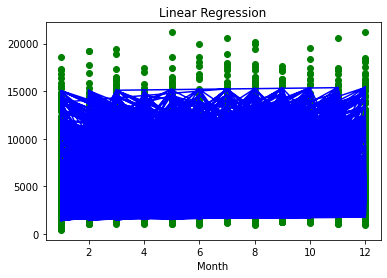

In [167]:
# Visualise the Linear Regression Result
plt.scatter(X_train['Month'], y_train, color = 'green') 
  
plt.plot(X_train['Month'], lr.predict(X_train), color = 'blue') 
plt.title('Linear Regression') 
plt.xlabel('Month') 
# plt.ylabel('Month') 

### Ridge Regression

In [168]:
rr = Ridge(alpha=0)
get_score(rr, X_train, X_test, y_train, y_test)

84.25

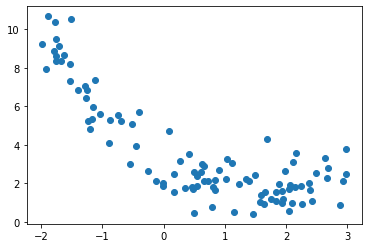

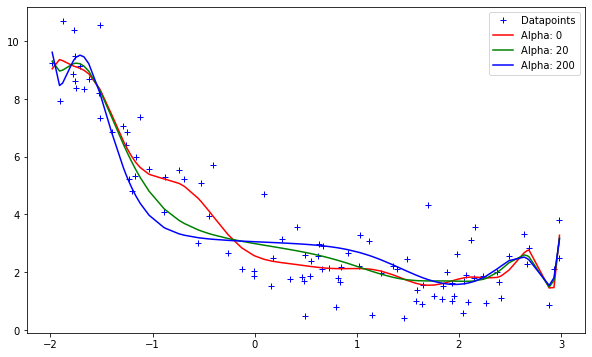

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

### Lasso Regression 

In [169]:
lasso=Lasso()
get_score(lasso, X_train, X_test, y_train, y_test)

83.47

### Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
X_test_polynom = polynom.fit_transform(X_test)
  
# X_polynom

In [41]:
PolyReg = LinearRegression() 
get_score(PolyReg, X_polynom, X_test_polynom, y_train, y_test)

MemoryError: Unable to allocate 4.75 GiB for an array with shape (17952, 35511) and data type float64

In [69]:
degree = [2,3,4,5]
Acc = np.zeros(4)


index=0
for d in degree:
    polynom = PolynomialFeatures(degree = d) 
    X_train_polynom = polynom.fit_transform(X_train)
    X_test_polynom = polynom.fit_transform(X_test)
    PolyReg = LinearRegression()
    Acc[index] = get_score(PolyReg, X_train_polynom, X_test_polynom, y_train, y_test)
    print('degree: ',d,'r2_score: ', Acc[index], '%')
    index += 1

plt.plot(degree, Acc, 'ro-')
plt.legend(['r2_score'])
plt.xlabel('degree')
plt.ylabel('r2_score')

MemoryError: Unable to allocate 4.75 GiB for an array with shape (17952, 35511) and data type float64

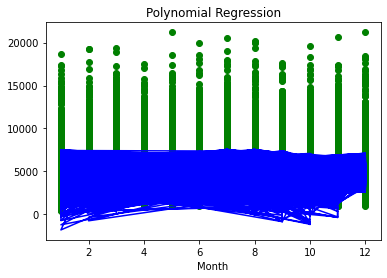

In [298]:
# Visualise the Polynomial Regression Results 
plt.scatter(X_train['Month'], y_train, color = 'green') 
  
plt.plot(X_train['Month'], PolyReg.predict(polynom.fit_transform(X_train)), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Month') 
# plt.ylabel('Height') 
  
plt.show() 

### Gausian Regression

In [265]:
GRReg = GaussianProcessRegressor()
get_score(GRReg, X_train, X_test, y_train, y_test)

MemoryError: Unable to allocate 1.20 GiB for an array with shape (161128176,) and data type float64

### Decision Tree Regression

In [170]:
DtReg = DecisionTreeRegressor(random_state = 0) 
get_score(DtReg, X_train, X_test, y_train, y_test)

70.17

In [244]:
# Visualise the Decision Tree Regression by creating range of values from min value of X_train to max value of X_train  
# having a difference of 0.01 between two consecutive values
# X_val = np.arange(min(X_train), max(X_train), 0.01) 
  
# #Reshape the data into a len(X_val)*1 array in order to make a column out of the X_val values 
# X_val = X_val.reshape((len(X_val), 1))  

# plt.scatter(X_train, y_train, color = 'blue') 
# plt.plot(X_val, DtReg.predict(X_val), color = 'red') 
# plt.title('Height prediction using Decision Tree Regression') 
# plt.xlabel('Age')  
# plt.ylabel('Height')
# plt.figure(figsize=(1,1))
# plt.show() 

In [301]:
from sklearn.tree import export_graphviz 
from sklearn import tree
  
tree.export_graphviz(DtReg, out_file ='dtregression.dot', 
               feature_names =['Item','Month', 'Year']
#                class_names = sorted(y_train.unique()), 
#                 label = 'all', 
#                 rounded = True,
#                 filled = True
               ) 

### Random Forest Regression

In [171]:
RFReg = RandomForestRegressor(n_estimators = 40)
get_score(RFReg, X_train, X_test, y_train, y_test)

80.51

In [ ]:
n_estimators = [10,20,30,40,45,50,55,60,70,80,90,100,200,300,400,500]
Acc = np.zeros(16)

index=0
for n in n_estimators:
    RFReg = RandomForestRegressor(n_estimators = n) 
    Acc[index] = get_score(RFReg, X_train, X_test, y_train, y_test)
    print('n_estimators = ', n, ',  r2_score = ', Acc[index], ' %')
    index += 1

plt.plot(n_neighbors, Acc, 'bv--')
plt.legend(['r2_score'])
plt.xlabel('n_estimators')
plt.ylabel('r2_score')

n_estimators =  10 ,  r2_score =  79.95  %
n_estimators =  20 ,  r2_score =  80.37  %
n_estimators =  30 ,  r2_score =  80.38  %
n_estimators =  40 ,  r2_score =  80.88  %
n_estimators =  45 ,  r2_score =  80.69  %
n_estimators =  50 ,  r2_score =  80.63  %
n_estimators =  55 ,  r2_score =  80.76  %
n_estimators =  60 ,  r2_score =  80.77  %
n_estimators =  70 ,  r2_score =  80.6  %
n_estimators =  80 ,  r2_score =  80.65  %
n_estimators =  90 ,  r2_score =  80.86  %
n_estimators =  100 ,  r2_score =  80.68  %
n_estimators =  200 ,  r2_score =  80.85  %


### K-Neighbors Regressor

In [114]:
KNReg = KNeighborsRegressor(n_neighbors=5) 
get_score(KNReg, X_train, X_test, y_train, y_test)

80.88

n_neighbors =  2 , Training r2_score =  88.07 , Testing r2_score =  68.83 , Diff =  1923.9999999999995  %
n_neighbors =  3 , Training r2_score =  86.14 , Testing r2_score =  71.94 , Diff =  1420.0000000000002  %
n_neighbors =  4 , Training r2_score =  83.98 , Testing r2_score =  67.61 , Diff =  1637.0000000000005  %
n_neighbors =  5 , Training r2_score =  79.98 , Testing r2_score =  60.8 , Diff =  1918.0000000000007  %
n_neighbors =  6 , Training r2_score =  73.31 , Testing r2_score =  54.18 , Diff =  1913.0000000000002  %
n_neighbors =  7 , Training r2_score =  66.67 , Testing r2_score =  48.78 , Diff =  1789.0  %
n_neighbors =  8 , Training r2_score =  61.06 , Testing r2_score =  44.22 , Diff =  1684.0000000000005  %
n_neighbors =  9 , Training r2_score =  56.08 , Testing r2_score =  40.59 , Diff =  1548.9999999999995  %
n_neighbors =  10 , Training r2_score =  51.96 , Testing r2_score =  37.07 , Diff =  1489.0  %


Text(0, 0.5, 'r2_score')

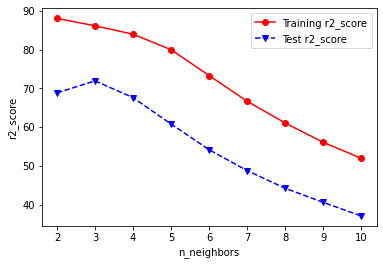

In [37]:
n_neighbors = [2,3,4,5,6,7,8,9,10]
trainAcc = np.zeros(9)
testAcc = np.zeros(9)

index=0
for n in n_neighbors:
    KNReg = KNeighborsRegressor(n_neighbors=n) 
    KNReg = KNReg.fit(X_train, y_train)
    score_train = KNReg.score(X_train, y_train)
    trainAcc[index] = round(score_train*100,2) # get_score(KNReg, X_train, X_test, y_train, y_test)
    score_test = KNReg.score(X_test, y_test)
    testAcc[index] = round(score_test*100,2)
    print('n_neighbors = ', n, ', Training r2_score = ', trainAcc[index], ', Testing r2_score = ', testAcc[index],
         ', Diff = ', np.abs((trainAcc[index]-testAcc[index])*100), ' %')
    index += 1

plt.plot(n_neighbors, trainAcc, 'ro-', n_neighbors, testAcc, 'bv--')
plt.legend(['Training r2_score', 'Test r2_score'])
plt.xlabel('n_neighbors')
plt.ylabel('r2_score')

### Support Vector Regression

In [99]:
svr = SVR()
get_score(svr, X_train, X_test, y_train, y_test)

-3.49

kernel =  linear , Training accuracy =  -3.4 , Testing accuracy =  -3.7 , Diff =  30.00000000000003  %
kernel =  poly , Training accuracy =  -3.4 , Testing accuracy =  -3.7 , Diff =  30.00000000000003  %
kernel =  rbf , Training accuracy =  -3.4 , Testing accuracy =  -3.7 , Diff =  30.00000000000003  %
kernel =  sigmoid , Training accuracy =  -3.4 , Testing accuracy =  -3.7 , Diff =  30.00000000000003  %
kernel =  precomputed , Training accuracy =  -3.4 , Testing accuracy =  -3.7 , Diff =  30.00000000000003  %


Text(0, 0.5, 'Accuracy')

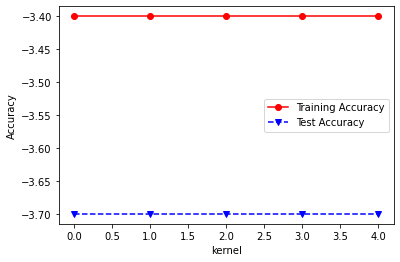

In [120]:
# maxdepths = [2,3,4,5,6,7,8,9,10,15,20,30,35,40,45,50]
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
trainAcc = np.zeros(5)
testAcc = np.zeros(5)

index=0
for k in kernel:
    svr = SVR()
    svr = svr.fit(X_train, y_train)
    score_train = svr.score(X_train, y_train)
    trainAcc[index] = round(score_train*100,2)
    score_test = svr.score(X_test, y_test)
    testAcc[index] = round(score_test*100,2)
    print('kernel = ', k, ', Training accuracy = ', trainAcc[index], ', Testing accuracy = ', testAcc[index],
         ', Diff = ', np.abs((trainAcc[index]-testAcc[index])*100), ' %')
    index += 1

kernel = ['linear' , 'poly', 'rbf', 'sigmoid', 'precomputed']
kernel_df = pd.DataFrame(list(kernel), columns=['kernel'])
kn = kernel_df['kernel']
kn = kn.map({'linear': 0, 'poly' :1, 'rbf' :2, 'sigmoid' :3, 'precomputed' :4})

plt.plot(kn, trainAcc, 'ro-', kn, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('kernel')
plt.ylabel('Accuracy')

### XGB Regressor

In [100]:
xgb = XGBRegressor()
get_score(xgb, X_train, X_test, y_train, y_test)

82.78

### Gradient Boosting Regressor

In [101]:
gbr = GradientBoostingRegressor()
get_score(gbr, X_train, X_test, y_train, y_test)

59.92

### Robust Regression — RANSAC

In [102]:
ransac = RANSACRegressor()
get_score(ransac, X_train, X_test, y_train, y_test)

45.16

### Neural Network Regression

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import tensorflow as tf

In [105]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(200, input_dim=265, activation='relu'))
model.add(Dense(100, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [106]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 73,401
Trainable params: 73,401
Non-trainable params: 0
_________________________________________________________________


In [107]:
X_train_tensor = tf.convert_to_tensor(X_train)
X_train_tensor
y = y_train.astype('float64')
y_train_tensor = tf.convert_to_tensor(y)
y_train_tensor

<tf.Tensor: shape=(17952,), dtype=float64, numpy=array([ 5151.  ,  8845.  ,  4336.  , ..., 12040.  ,  1640.25,  2457.  ])>

In [108]:
history = model.fit(X_train_tensor, y_train_tensor, validation_split=0.2, epochs =10)

Epoch 1/10
449/449 [==============================] - 3s 2ms/step - loss: 15158861.0000 - mae: 2975.6704 - val_loss: 8372359.0000 - val_mae: 2086.1619
Epoch 2/10
449/449 [==============================] - 1s 2ms/step - loss: 7110586.0000 - mae: 1867.5312 - val_loss: 5803086.0000 - val_mae: 1626.6560
Epoch 3/10
449/449 [==============================] - 1s 2ms/step - loss: 4448821.0000 - mae: 1390.3098 - val_loss: 3393653.7500 - val_mae: 1179.4673
Epoch 4/10
449/449 [==============================] - ETA: 0s - loss: 2578004.0000 - mae: 1018.96 - 1s 2ms/step - loss: 2563598.5000 - mae: 1016.1181 - val_loss: 1958889.1250 - val_mae: 885.7416
Epoch 5/10
449/449 [==============================] - 1s 2ms/step - loss: 1575214.1250 - mae: 803.1557 - val_loss: 1346254.7500 - val_mae: 769.0193
Epoch 6/10
449/449 [==============================] - 1s 2ms/step - loss: 1201513.6250 - mae: 737.3986 - val_loss: 1118459.0000 - val_mae: 730.8217
Epoch 7/10
449/449 [==============================] - 1s 2

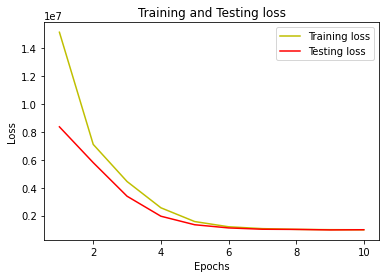

In [110]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

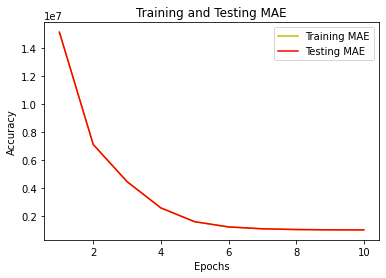

In [111]:
acc = history.history['loss'] # mean_absolute_error
val_acc = history.history['loss'] # val_mean_absolute_error
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Testing MAE')
plt.title('Training and Testing MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()